## **Projeto de IA - Previsão de Doença Cardíaca**



A doença cardíaca é uma condição médica significativa que afeta milhões de pessoas em todo o mundo. O objetivo deste projeto é explorar o uso de aprendizado de máquina para prever a presença de doença cardíaca com base em atributos específicos.

# **Objetivo**

O principal objetivo deste projeto é desenvolver um modelo preditivo usando o conjunto de dados de Cleveland para distinguir a presença ou ausência de doença cardíaca. Pretendemos utilizar técnicas de explicabilidade de machine learning para entender melhor como o modelo toma decisões.

O conjunto de dados contém 76 atributos, mas focaremos em um subconjunto de 14 deles. Utilizaremos o modelo Random Forest Classifier para realizar a previsão e, em seguida, exploraremos a explicabilidade do modelo por meio de ferramentas como SHAP (SHapley Additive exPlanations) e eli5.

In [9]:
pip install pdpbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.1 MB/s eta 0:00:00


In [7]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.3 MB/s eta 0:00:00


In [6]:
pip install eli5


# **Importação de Bibliotecas**

Importei diversas bibliotecas necessárias para realizar análise de dados e construção do modelo.

Algumas das principais bibliotecas incluem:

**numpy** e **pandas** para manipulação de dados.
**matplotlib** e **seaborn** para visualização de dados.

**RandomForestClassifier** e **DecisionTreeClassifier** do **scikit-learn** para construir modelos de aprendizado de máquina.

Diversas bibliotecas para análise de resultados, como **roc_curve**, **auc**, **classification_report**, **confusion_matrix**.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots
np.random.seed(123)

pd.options.mode.chained_assignment = None

# **Leitura e pré-processamento dos dados**

In [12]:
from google.colab import files

uploaded = files.upload()



Saving heart.csv to heart.csv


In [16]:
import pandas as pd


ht = 'heart.csv'

ht = list(uploaded.keys())[0]


In [24]:

dados = pd.read_csv('heart.csv')

In [26]:
dados.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
from sklearn.model_selection import train_test_split


# **Divisão dos dados em conjuntos de treino e teste**

**Divisão dos Dados em Treino e Teste:**
* Utilizei a função train_test_split para dividir os dados em conjuntos de treino (X_train, y_train) e teste (X_test, y_test).
* O conjunto de recursos (X) exclui a coluna alvo (target), que é armazenada no conjunto de rótulos (y).
* A divisão é feita com uma proporção de 80% para treino e 20% para teste, e o parâmetro random_state garante reprodutibilidade.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(dados.drop('target', 1), dados['target'], test_size=0.2, random_state=10)

# **Treinamento do modelo Random Forest Classifier**

Criei um modelo Random Forest Classifier com uma profundidade máxima de 5.

Utilizei o conjunto de treino (X_train, y_train) para treinar o modelo.


In [32]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [33]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [34]:
export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

# **Análise de resultados e métricas de desempenho**

Realizado previsões no conjunto de teste (X_test) e foi calculado métricas como matriz de confusão (confusion_matrix).

**y_pred_quant** contém as probabilidades previstas, enquanto y_pred_bin contém as previsões binárias (0 ou 1).


In [35]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [36]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[28,  7],
       [ 5, 21]])

In [37]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8484848484848485
Specificity :  0.75


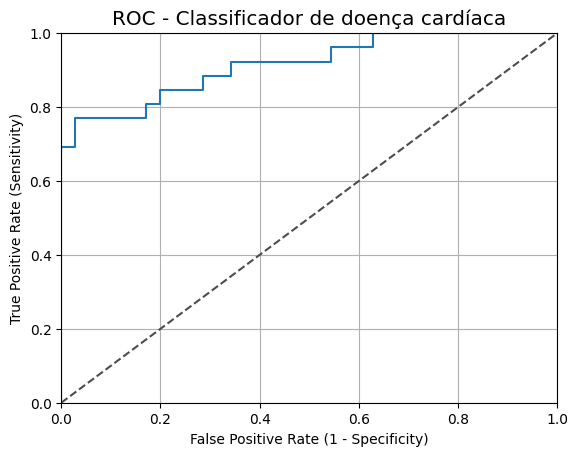

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC - Classificador de doença cardíaca')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [39]:
auc(fpr, tpr)

0.9142857142857144

In [40]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0525 ± 0.0321,cp
0.0197 ± 0.0245,oldpeak
0.0131 ± 0.0525,thal
0.0131 ± 0.0669,ca
0.0131 ± 0.0564,age
0.0066 ± 0.0262,sex
0.0000 ± 0.0207,slope
0 ± 0.0000,fbs
-0.0033 ± 0.0131,restecg
-0.0033 ± 0.0245,chol


# **Explicabilidade do modelo usando SHAP**

Explicabilidade do Modelo usando SHAP:

* Criado um objeto explainer usando a biblioteca SHAP para explicar as decisões do modelo.
* Calculado os valores SHAP para o conjunto de teste (X_test).

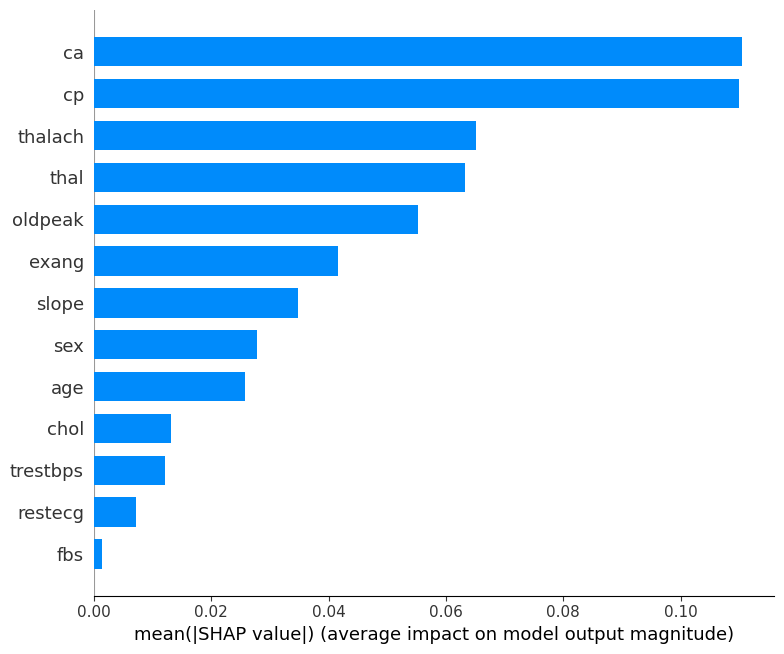

In [41]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# **Visualização de Gráficos SHAP:**

* Usado a função summary_plot da SHAP para criar gráficos que resumem a importância de cada variável de entrada no modelo.
* shap_values[1] refere-se à classe que representa a presença de doença cardíaca.

# **Análise de Resultados**
Os resultados incluem métricas de desempenho do modelo, como sensibilidade e especificidade, além de uma curva ROC. A explicabilidade do modelo também foi explorada por meio de gráficos SHAP.

O projeto proporcionou insights sobre a aplicação de machine learning na previsão de doença cardíaca. A explicabilidade do modelo é crucial, especialmente em contextos médicos. Este trabalho fornece uma base para futuras investigações e melhorias no modelo.